___


___
# Linear Regression - Project

Just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.


## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from plotly.offline import download_plotlyjs ,init_notebook_mode,plot ,iplot

In [3]:
import cufflinks as cf

In [4]:
init_notebook_mode(connected=True)

In [5]:
cf.go_offline()

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [7]:
customers = pd.read_csv("Ecommerce Customers")

### Check the customer data sets

In [32]:
customers

Email  \
0          mstephenson@fernandez.com   
1                  hduke@hotmail.com   
2                   pallen@yahoo.com   
3            riverarebecca@gmail.com   
4      mstephens@davidson-herman.com   
5             alvareznancy@lucas.biz   
6              katherine20@yahoo.com   
7                 awatkins@yahoo.com   
8        vchurch@walter-martinez.com   
9                   bonnie69@lin.biz   
10             andrew06@peterson.com   
11            ryanwerner@freeman.biz   
12                 knelson@gmail.com   
13             wrightpeter@yahoo.com   
14             taylormason@gmail.com   
15               jstark@anderson.com   
16               wjennings@gmail.com   
17          rebecca45@hale-bauer.biz   
18           alejandro75@hotmail.com   
19            samuel46@love-west.net   
20                 megan33@gmail.com   
21                 agolden@yahoo.com   
22             vstafford@hotmail.com   
23   denise22@hernandez-townsend.com   
24            youngbarbara@yahoo.com   
25           william25@mcconnell.com   
26          ijones@schaefer-carr.net   
27             heatherhall@yahoo.com   
28           tinasmith@martinez.info   
29         chasejennifer@hotmail.com   
..                               ...   
470           kennethperry@bowen.org   
471               prussell@lopez.com   
472            mosleyjacob@yahoo.com   
473                  rhaas@yahoo.com   
474        antonioharris@hotmail.com   
475           austinthomas@gmail.com   
476            bethsullivan@reed.net   
477              ncummings@yahoo.com   
478                hking@hotmail.com   
479             annstone@hotmail.com   
480        christopher44@hotmail.com   
481       autumn88@mendoza-mills.com   
482                dhudson@ramos.net   
483               egomez@hotmail.com   
484    kimberlyruiz@smith-gordon.com   
485          mooremichelle@logan.com   
486                aaron22@gmail.com   
487       michelleshepherd@price.com   
488                zscott@wright.com   
489              tracy79@wheeler.net   
490              brian28@sanchez.org   
491       leonardhancock@hotmail.com   
492       davidsonkathleen@gmail.com   
493              nathan84@lowery.net   
494            kellydeborah@chan.biz   
495     lewisjessica@craig-evans.com   
496              katrina56@gmail.com   
497               dale88@hotmail.com   
498              cwilson@hotmail.com   
499        hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
5    645 Martha Park Apt. 611\nJeffreychester, MN 6...       FloralWhite   
6    68388 Reyes Lights Suite 692\nJosephbury, WV 9...     DarkSlateBlue   
7                Unit 6538 Box 8980\nDPO AP 09026-4941              Aqua   
8               860 Lee Key\nWest Debra, SD 97450-0495            Salmon   
9                PSC 2734, Box 5255\nAPO AA 98456-7482             Brown   
10   26104 Alexander Groves\nAlexandriaport, WY 282...            Tomato   
11               Unit 2413 Box 0347\nDPO AA 07580-2652            Tomato   
12   6705 Miller Orchard Suite 186\nLake Shanestad,...         RoyalBlue   
13    05302 Dunlap Ferry\nNew Stephaniehaven, MP 42268            Bisque   
14   7773 Powell Springs Suite 190\nSamanthaland, N...          DarkBlue   
15   49558 Ramirez Road Suite 399\nPhillipstad, OH ...              Peru   
16         6362 Wilson Mountain\nJohnsonfurt, GA 15169        PowderBlue   
17                8982 Burton Row\nWilsonton, PW 88606         OliveDrab   
18   64475 Andre Club Apt. 795\nPort Dannytown, PW ...              Cyan   
19   544 Alexander Heights Sui

#### There are 500 rows and 8 columns

**Check the head of customers, and check out its info() and describe() methods.**

In [9]:
customers.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

#### Check the last 5 customers's details 

In [31]:
customers.tail()

Email  \
495  lewisjessica@craig-evans.com   
496           katrina56@gmail.com   
497            dale88@hotmail.com   
498           cwilson@hotmail.com   
499     hannahwilson@davidson.com   

                                               Address         Avatar  \
495  4483 Jones Motorway Suite 872\nLake Jamiefurt,...            Tan   
496  172 Owen Divide Suite 497\nWest Richard, CA 19320  PaleVioletRed   
497  0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...       Cornsilk   
498  680 Jennifer Lodge Apt. 808\nBrendachester, TX...           Teal   
499  49791 Rachel Heights Apt. 898\nEast Drewboroug...    DarkMagenta   

     Avg. Session Length  Time on App  Time on Website  Length of Membership  \
495            33.237660    13.566160        36.417985              3.746573   
496            34.702529    11.695736        37.190268              3.576526   
497            32.646777    11.499409        38.332576              4.958264   
498            33.322501    12.391423        36.840086              2.336485   
499            33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
495           573.847438  
496           529.049004  
497           551.620145  
498           456.469510  
499           497.778642

### Check all the bulk details of customers-
#### 1. Count
#### 2. Mean
#### 3. Standard Daviation
#### 2. Min
#### 2. 25%
#### 2. 50%
#### 2. 75%
#### 2. maximum

In [11]:
cd=customers.describe()

In [12]:
cd

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

## Now  I will plot box plot with the help of interactive iplot which will show each indivisual entity

In [33]:
customers.iplot(kind='box')

### Now I am checking the customer's info to find out null value
### If there will be any null value i will apply some concept and remove it

In [34]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


# Now I will plot 3D graph of describe value of customers including all the min standard value etc

In [20]:
cd.iplot(kind='surface' ,colorscale='rdylbu')

## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [35]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

C:\Users\manish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\manish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



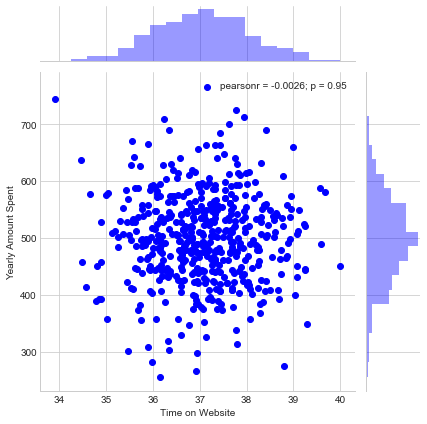

In [36]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers ,color = 'blue')

** Do the same but with the Time on App column instead. **

C:\Users\manish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\manish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



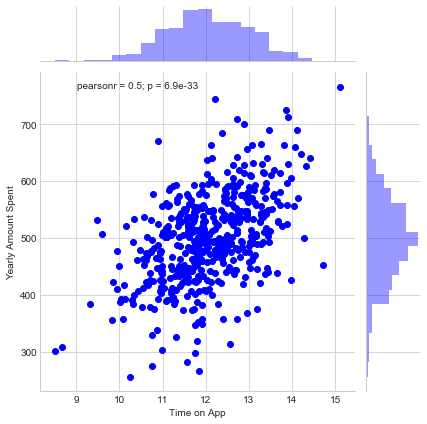

In [37]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers , color = 'blue')

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

C:\Users\manish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\manish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



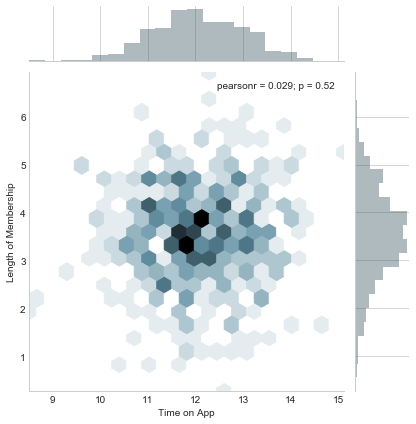

In [38]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

#### Analyze each and every relations on the table to obtain a real data analysis so that there be no mistakes while predicting the results

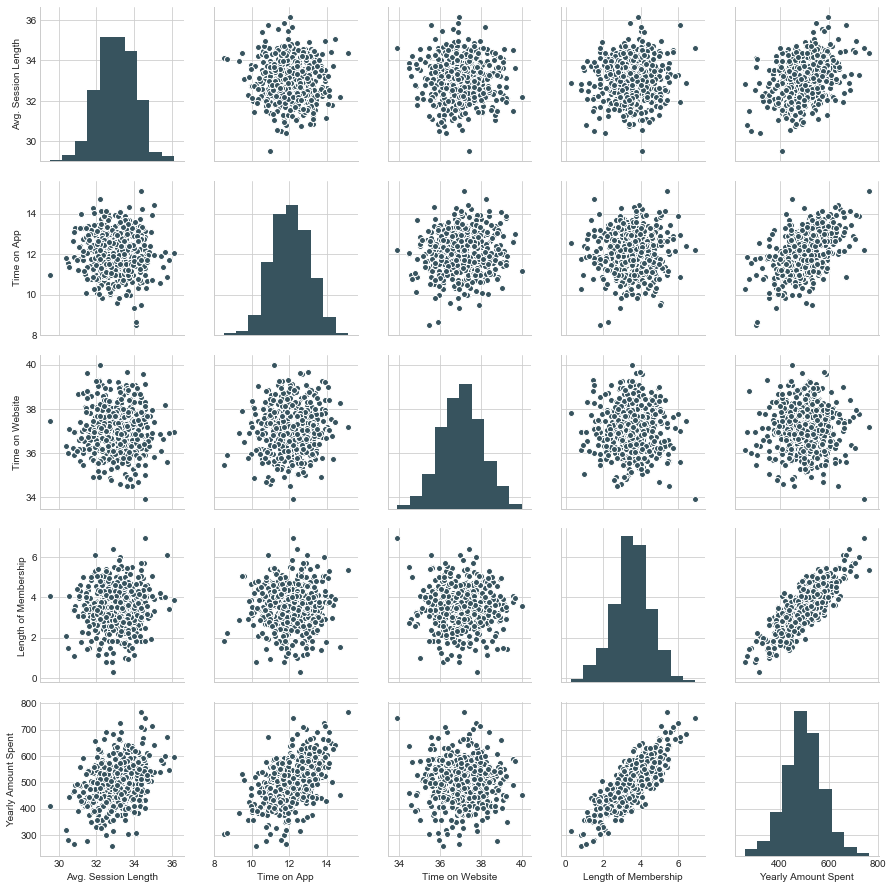

In [30]:
sns.pairplot(customers)

### I will also see the describe graph of customers in plotly to find best  results

In [40]:
cd.scatter_matrix()

### Creating a linear plot bw Length of Membership and Yearly amount spent

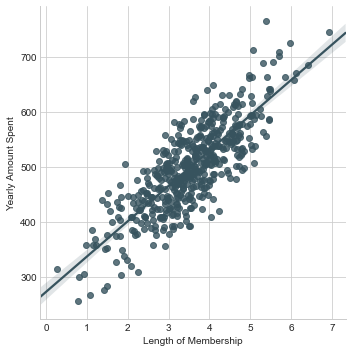

In [41]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Also Creating 3D graph

In [45]:
customers[['Length of Membership' ,'Yearly Amount Spent']].iplot(kind='spread')

### Also Creating Scatter Plot

In [44]:
customers.iplot(kind='scatter' ,x='Length of Membership',y='Yearly Amount Spent' ,mode='markers')

# Machine Learning Section

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [58]:
y = customers['Yearly Amount Spent']

In [59]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

#### Because there is linear relation so  I will apply the linear regression algorithm of machine learning

In [62]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [63]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [64]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [65]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [66]:
predictions = lm.predict( X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0,0.5,'Predicted Y')

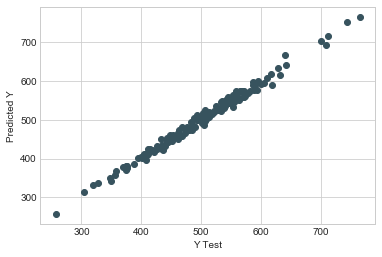

In [70]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## As the predioction is linear with the testing data means our testing data is correct

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [71]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430817
MSE: 79.81305165097437
RMSE: 8.93381506697863


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

C:\Users\manish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



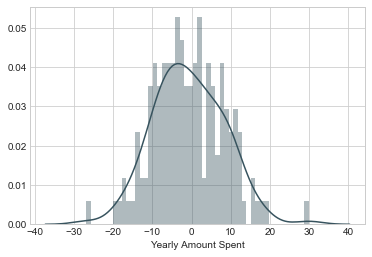

In [72]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [74]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097

In [77]:
coeffecients.iplot(kind = 'scatter')

In [2]:
coeffecients.iplot(kind='surface' ,colorscale='rdylbu')

NameError: name 'coeffecients' is not defined

# As we see the time spent on mobile app is more in future also
# So company should focus on devlopment of mobile app

** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!


#                                             End